<a href="https://colab.research.google.com/github/jaiharish07/JAI-HARISH/blob/main/Text_Analysis_Project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
from google.colab import drive
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import cmudict
from nltk import download
from string import punctuation
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/text analysis data files/Input.xlsx')

# Function to extract article text from a URL
def extract_article_text(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find the main content of the article based on the HTML structure of the website
        article_content = soup.find('div', class_='article-content')
        if article_content:
            article_text = article_content.get_text()
        else:
            # If specific class name not found, try to extract the main content using other methods
            article_text = soup.find('article').get_text()  # Example: <article> tag
        return article_text.strip()
    except Exception as e:
        print(f"Error extracting article from {url}: {e}")
        return None

# Create a directory to store text files
os.makedirs("text_articles", exist_ok=True)

# Iterate over each row in the dataset and extract article text
for idx, row in dataset.iterrows():
    url_id = row['URL_ID']
    url = row['URL']
    article_text = extract_article_text(url)
    if article_text is not None:
        # Save the extracted article text to a text file
        filename = f"text_articles/{url_id}.txt"
        with open(filename, 'w') as file:
            file.write(article_text)
        print(f"Article saved for URL_ID {url_id}")

print("All articles saved to the 'text_articles' directory")

In [ ]:
# Initialize empty dictionaries
positive_words_dict = {}
negative_words_dict = {}

positive_words_path = '/content/drive/MyDrive/words +-/positive-words.txt'
negative_words_path ='/content/drive/MyDrive/words +-/negative-words.txt'
# Read positive words from file
with open(positive_words_path, 'r',encoding='latin-1') as file:
    positive_words = file.read().splitlines()

# Read negative words from file
with open(negative_words_path, 'r',encoding='latin-1') as file:
    negative_words = file.read().splitlines()

# Populate dictionaries
for word in positive_words:
    positive_words_dict[word] = True  # You can use any value to represent positive words

for word in negative_words:
    negative_words_dict[word] = True  # You can use any value to represent negative words

# Print dictionaries
print("Positive Words Dictionary:")
print(positive_words_dict)

print("\nNegative Words Dictionary:")
print(negative_words_dict)

Positive Words Dictionary:
{'a+': True, 'abound': True, 'abounds': True, 'abundance': True, 'abundant': True, 'accessable': True, 'accessible': True, 'acclaim': True, 'acclaimed': True, 'acclamation': True, 'accolade': True, 'accolades': True, 'accommodative': True, 'accomodative': True, 'accomplish': True, 'accomplished': True, 'accomplishment': True, 'accomplishments': True, 'accurate': True, 'accurately': True, 'achievable': True, 'achievement': True, 'achievements': True, 'achievible': True, 'acumen': True, 'adaptable': True, 'adaptive': True, 'adequate': True, 'adjustable': True, 'admirable': True, 'admirably': True, 'admiration': True, 'admire': True, 'admirer': True, 'admiring': True, 'admiringly': True, 'adorable': True, 'adore': True, 'adored': True, 'adorer': True, 'adoring': True, 'adoringly': True, 'adroit': True, 'adroitly': True, 'adulate': True, 'adulation': True, 'adulatory': True, 'advanced': True, 'advantage': True, 'advantageous': True, 'advantageously': True, 'advan

In [ ]:

nltk.download('punkt')

# Mount Google Drive
drive.mount('/content/drive')

# Load stopwords from file in Google Drive
stopwords_dir = '/content/drive/MyDrive/stopwords'
all_stopwords = set()
for file_name in os.listdir(stopwords_dir):
    file_path = os.path.join(stopwords_dir, file_name)
    with open(file_path, 'r',encoding='latin-1') as file:
        stopwords = file.read().splitlines()
        all_stopwords.update(stopwords)

# Load the text data directory
text_article_dir = "/content/text_articles"
processed_text_dir = '/content/drive/MyDrive/processed_text'
os.makedirs(processed_text_dir, exist_ok=True)

for file_name in os.listdir(text_article_dir):
    file_path = os.path.join(text_article_dir, file_name)
    url_id = os.path.splitext(file_name)[0]
    with open(file_path, 'r') as file:
        text_data = file.read()
        tokens = word_tokenize(text_data)
        filtered_tokens = [word for word in tokens if word.lower() not in all_stopwords]
        processed_text = ' '.join(filtered_tokens)
        processed_file_path = os.path.join(processed_text_dir, f"{url_id}_processed.txt")
        with open(processed_file_path, 'w') as processed_file:
            processed_file.write(processed_text)

print("Stopwords removed from text data and saved in the 'processed_text' directory")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Stopwords removed from text data and saved in the 'processed_text' directory


In [ ]:
# Path to the directory containing processed text files
processed_text_directory = '/content/drive/MyDrive/processed_text'

# Path to the directory to save tokenized data
tokenized_data_directory = '/content/tokenized_data'

# Create the directory if it doesn't exist
os.makedirs(tokenized_data_directory, exist_ok=True)

# Iterate over each file in the directory
for filename in os.listdir(processed_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(processed_text_directory, filename)
        tokenized_file_path = os.path.join(tokenized_data_directory, filename)  # Define tokenized_file_path here
        with open(file_path, 'r') as file:
            text_data = file.read()
            # Tokenize the text into a list of tokens
            tokens = word_tokenize(text_data)
            # Print or use the tokens as needed
            print(f"Tokens for {filename}: {tokens}")
        with open(tokenized_file_path, 'w') as tokenized_file:  # Use tokenized_file_path here
            tokenized_file.write(' '.join(tokens))

In [ ]:
# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Path to the positive and negative word dictionaries
positive_dict_file = '/content/drive/MyDrive/words +-/positive-words.txt'
negative_dict_file = '/content/drive/MyDrive/words +-/negative-words.txt'

# Create the results directory if it doesn't exist
results_directory = '/content/Sentimental Analysis'
os.makedirs(results_directory, exist_ok=True)

# Load the positive and negative word dictionaries
with open(positive_dict_file, 'r',encoding='latin-1') as f:
    positive_words = set(f.read().splitlines())
with open(negative_dict_file, 'r',encoding='latin-1') as f:
    negative_words = set(f.read().splitlines())

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = file.read().split()
            # Calculate scores
            positive_score = sum(1 for token in tokens if token in positive_words)
            negative_score = sum(1 for token in tokens if token in negative_words)
            polarity_score = (positive_score - negative_score) / ((positive_score + negative_score) + 0.000001)
            subjectivity_score = (positive_score + negative_score) / (len(tokens) + 0.000001)
            # Save the scores to a file
            url_id = filename.split('.')[0]
            output_file_path = os.path.join(results_directory, f"{url_id}.txt")
            with open(output_file_path, 'w') as output_file:
                output_file.write(f"{url_id}\n")
                output_file.write(f"Positive Score: {positive_score}\n")
                output_file.write(f"Negative Score: {negative_score}\n")
                output_file.write(f"Polarity Score: {polarity_score}\n")
                output_file.write(f"Subjectivity Score: {subjectivity_score}\n")

In [ ]:
download('punkt')
download('cmudict')

def count_complex_words(tokens, cmu_dict):
    complex_word_count = 0
    for token in tokens:
        syllables = cmu_dict.get(token.lower(), [])
        if any(len([y for y in x if y[-1].isdigit()]) > 2 for x in syllables):
            complex_word_count += 1
    return complex_word_count

# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Load the CMU Pronouncing Dictionary
cmu_dict = cmudict.dict()

# Create a directory to save the results
results_directory = '/content/Analysis of Readability'
os.makedirs(results_directory, exist_ok=True)

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = word_tokenize(file.read())
            num_words = len(tokens)
            num_sentences = len([token for token in tokens if token in ['.', '!', '?']])

            # Calculate average sentence length
            avg_sentence_length = num_words / (num_sentences or 1)

            # Calculate percentage of complex words
            num_complex_words = count_complex_words(tokens, cmu_dict)
            percentage_complex_words = num_complex_words / num_words if num_words > 0 else 0

            # Calculate Fog Index
            fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)

            # Save the results in a file
            output_file_path = os.path.join(results_directory, f"{filename.split('.')[0]}.txt")
            with open(output_file_path, 'w') as output_file:
                output_file.write(f"{filename.split('.')[0]}\n")
                output_file.write(f"Average Sentence Length: {avg_sentence_length}\n")
                output_file.write(f"Percentage of Complex Words: {percentage_complex_words}\n")
                output_file.write(f"Fog Index: {fog_index}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [ ]:
download('punkt')
download('cmudict')

def count_complex_words(tokens, cmu_dict):
    complex_word_count = 0
    for token in tokens:
        syllables = cmu_dict.get(token.lower(), [])
        if any(len([y for y in x if y[-1].isdigit()]) > 2 for x in syllables):
            complex_word_count += 1
    return complex_word_count

# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Load the CMU Pronouncing Dictionary
cmu_dict = cmudict.dict()

# Create a directory to save the results
results_directory = '/content/Analysis of readability'
os.makedirs(results_directory, exist_ok=True)

# Dictionary to keep track of processed URLs
processed_urls = {}

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        url_id = filename.split('.')[0]
        if url_id in processed_urls:
            continue  # Skip if already processed
        processed_urls[url_id] = True  # Mark as processed

        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = word_tokenize(file.read())
            num_words = len(tokens)
            num_sentences = len([token for token in tokens if token in ['.', '!', '?']])

            # Calculate average sentence length
            avg_sentence_length = num_words / (num_sentences or 1)

            # Calculate percentage of complex words
            num_complex_words = count_complex_words(tokens, cmu_dict)
            percentage_complex_words = num_complex_words / num_words if num_words > 0 else 0

            # Calculate Fog Index
            fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)

            # Save the results in a file
            output_file_path = os.path.join(results_directory, f"{url_id}.txt")
            with open(output_file_path, 'w') as output_file:
                output_file.write(f"URL ID: {url_id}\n")
                output_file.write(f"Average Sentence Length: {avg_sentence_length}\n")
                output_file.write(f"Percentage of Complex Words: {percentage_complex_words}\n")
                output_file.write(f"Fog Index: {fog_index}\n")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [ ]:
# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Create a directory to save the results
results_directory = '/content/Average Number of Words Per Sentence'
os.makedirs(results_directory, exist_ok=True)

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = word_tokenize(file.read())
            num_words = len(tokens)
            num_sentences = len([token for token in tokens if token in ['.', '!', '?']])
            # Calculate average number of words per sentence
            avg_words_per_sentence = num_words / (num_sentences or 1)
            # Save the result in a file
            output_file_path = os.path.join(results_directory, f"{filename.split('.')[0]}_avg_words_per_sentence.txt")
            with open(output_file_path, 'w') as output_file:
                output_file.write(f"{filename.split('.')[0]}\n")
                output_file.write(f"Average Number of Words Per Sentence: {avg_words_per_sentence}\n")

In [ ]:
download('punkt')
download('cmudict')

# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Load the CMU Pronouncing Dictionary
cmu_dict = cmudict.dict()

# Create a directory to save the results
results_directory = '/content/complex word count'
os.makedirs(results_directory, exist_ok=True)

# Function to count complex words in a list of tokens
def count_complex_words(tokens, cmu_dict):
    complex_word_count = 0
    for token in tokens:
        # Check if the token has more than two syllables
        syllables = cmu_dict.get(token.lower(), [])
        if any(len([y for y in x if y[-1].isdigit()]) > 2 for x in syllables):
            complex_word_count += 1
    return complex_word_count

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = word_tokenize(file.read())
            # Count complex words
            complex_word_count = count_complex_words(tokens, cmu_dict)
            # Save the result in a file
            output_file_path = os.path.join(results_directory, f"{filename.split('.')[0]}_complex_words.txt")
            with open(output_file_path, 'w') as output_file:
                output_file.write(f"URL ID: {filename.split('.')[0]}\n")
                output_file.write(f"Number of Complex Words: {complex_word_count}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [ ]:
# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Path to the directory containing stopwords
stopwords_directory = '/content/drive/MyDrive/stopwords'


for filename in os.listdir(stopwords_directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(stopwords_directory, filename)
        with open(filepath, 'r', encoding='latin-1') as file:
            stopwords_data = file.read()

# Create a directory to save the results
results_directory = '/content/word counts'
os.makedirs(results_directory, exist_ok=True)

# Function to remove stopwords and punctuation and count words
def count_words(tokens):
    cleaned_tokens = [token for token in tokens if token.lower() not in stopwords_data and token not in punctuation]
    return len(cleaned_tokens)

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = word_tokenize(file.read())
            # Count words after removing stopwords and punctuation
            num_words = count_words(tokens)
            # Save the count to a file
            output_file_path = os.path.join(results_directory, f"{filename.split('.')[0]}_word_count.txt")
            with open(output_file_path, 'w') as output_file:
                output_file.write(f"URL ID: {filename.split('.')[0]}\n")
                output_file.write(f"Word Count: {num_words}")

In [ ]:
# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Create a directory to save the results
results_directory = '/content/Syllable Count Per Word'
os.makedirs(results_directory, exist_ok=True)

# Function to count syllables in a word
def count_syllables(word):
    vowels = 'aeiouy'
    count = 0
    endings = ['es', 'ed']
    if word[-2:] in endings:
        return count
    else:
        if word[0] in vowels:
            count += 1
        for index in range(1, len(word)):
            if word[index] in vowels and word[index - 1] not in vowels:
                count += 1
        if word.endswith('e'):
            count -= 1
        if count == 0:
            count += 1
        return count

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = word_tokenize(file.read())
            # Count syllables for each word
            syllable_counts = [count_syllables(token.lower()) for token in tokens]
            # Save the counts to a file
            output_file_path = os.path.join(results_directory, f"{filename.split('.')[0]}_syllable_counts.txt")
            with open(output_file_path, 'w') as output_file:
                for i, count in enumerate(syllable_counts, start=1):
                    output_file.write(f"Word {i}: {count}\n")

In [ ]:
# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Create a directory to save the results
results_directory = '/content/Personal Pronoun'
os.makedirs(results_directory, exist_ok=True)

# Regex pattern to match personal pronouns
pronoun_pattern = r"\b(?:I|we|my|ours|us)\b"

# Function to count personal pronouns in a list of tokens
def count_personal_pronouns(tokens):
    text = ' '.join(tokens)
    return len(re.findall(pronoun_pattern, text, flags=re.IGNORECASE))

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = word_tokenize(file.read())
            # Count personal pronouns
            personal_pronoun_count = count_personal_pronouns(tokens)
            # Save the count to a file
            output_file_path = os.path.join(results_directory, f"{filename.split('.')[0]}_personal_pronouns_count.txt")
            with open(output_file_path, 'w') as output_file:
                output_file.write(f"Personal Pronouns Count: {personal_pronoun_count}\n")

In [ ]:
import os
from nltk.tokenize import word_tokenize

# Path to the directory containing tokenized text files
tokenized_text_directory = '/content/tokenized_data'

# Function to calculate average word length
def calculate_average_word_length(tokens):
    total_characters = sum(len(token) for token in tokens)
    total_words = len(tokens)
    return total_characters / (total_words or 1)  # Avoid division by zero

# Create a directory to save the results
results_directory = '/content/average word length'
os.makedirs(results_directory, exist_ok=True)

# Iterate over each file in the directory
for filename in os.listdir(tokenized_text_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(tokenized_text_directory, filename)
        with open(file_path, 'r') as file:
            tokens = word_tokenize(file.read())
            # Calculate average word length
            average_word_length = calculate_average_word_length(tokens)
            # Get the URL ID from the filename
            url_id = filename.split('_')[0]
            # Save the result to a file in the results directory
            output_file_path = os.path.join(results_directory, f"{url_id}_average_word_length.txt")
            with open(output_file_path, 'w') as output_file:
                output_file.write(f"URL ID: {url_id}\n")
                output_file.write(f"Average Word Length: {average_word_length}\n")

print(f"Results saved to {results_directory}")


Results saved to /content/average word length


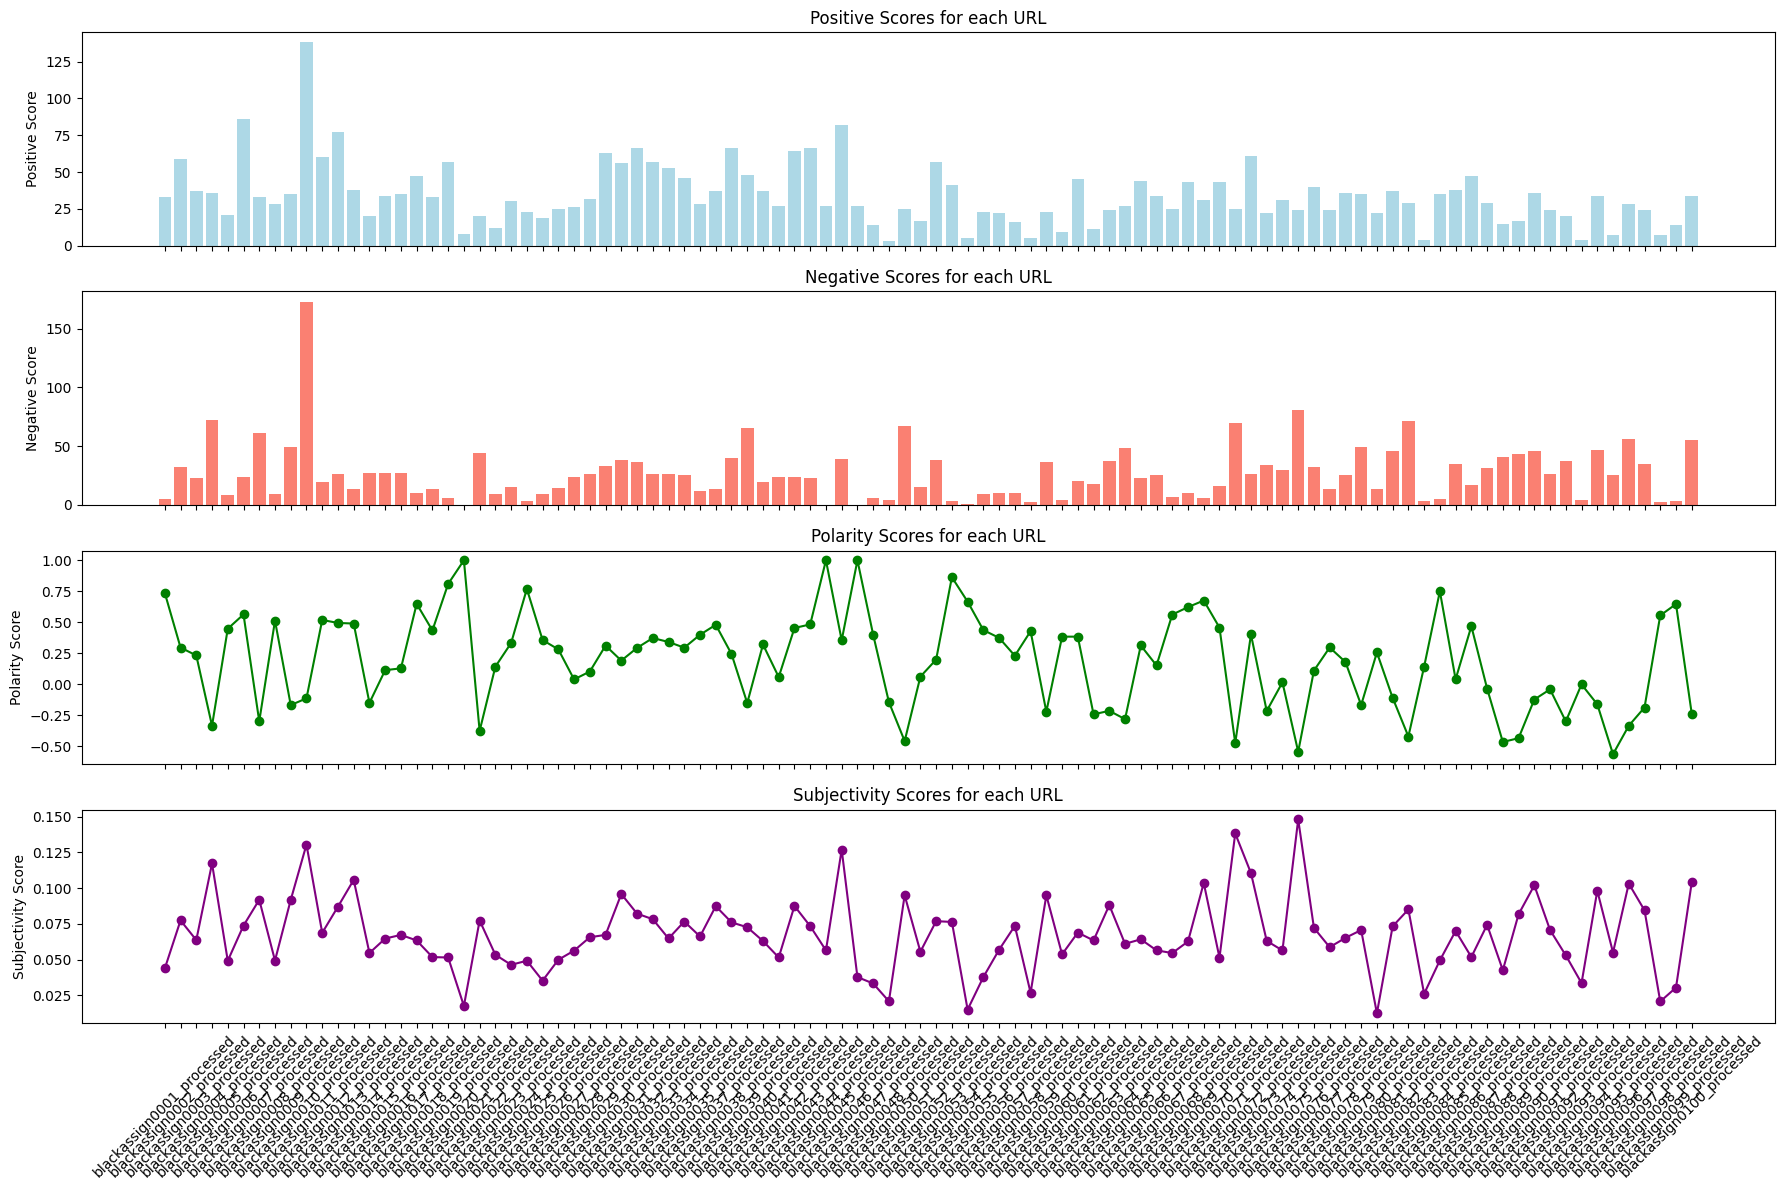

In [ ]:
# Path to the directory containing the text files
scores_directory = '/content/Sentimental Analysis'

# Initialize lists to store URL IDs, positive scores, negative scores, polarity scores, and subjectivity scores
url_ids = []
positive_scores = []
negative_scores = []
polarity_scores = []
subjectivity_scores = []

# Iterate over each file in the directory
for filename in os.listdir(scores_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(scores_directory, filename)
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # Find and extract the scores from the lines
            positive_score_line = [line for line in lines if line.startswith('Positive Score:')][0]
            positive_score = float(positive_score_line.split(':')[1].strip())

            negative_score_line = [line for line in lines if line.startswith('Negative Score:')][0]
            negative_score = float(negative_score_line.split(':')[1].strip())

            polarity_score_line = [line for line in lines if line.startswith('Polarity Score:')][0]
            polarity_score = float(polarity_score_line.split(':')[1].strip())

            subjectivity_score_line = [line for line in lines if line.startswith('Subjectivity Score:')][0]
            subjectivity_score = float(subjectivity_score_line.split(':')[1].strip())

            url_ids.append(filename.split('.')[0])  # Extract URL ID from the file name
            positive_scores.append(positive_score)
            negative_scores.append(negative_score)
            polarity_scores.append(polarity_score)
            subjectivity_scores.append(subjectivity_score)

# Sort the data by URL ID
data_sorted = sorted(zip(url_ids, positive_scores, negative_scores, polarity_scores, subjectivity_scores), key=lambda x: int(x[0].split('_')[0].replace('blackassign', '')))
url_ids_sorted, positive_scores_sorted, negative_scores_sorted, polarity_scores_sorted, subjectivity_scores_sorted = zip(*data_sorted)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(18, 12), sharex=True)

# Plot Positive Scores
axs[0].bar(url_ids_sorted, positive_scores_sorted, color='lightblue')
axs[0].set_ylabel('Positive Score')
axs[0].set_title('Positive Scores for each URL')

# Plot Negative Scores
axs[1].bar(url_ids_sorted, negative_scores_sorted, color='salmon')
axs[1].set_ylabel('Negative Score')
axs[1].set_title('Negative Scores for each URL')

# Plot Polarity Scores
axs[2].plot(url_ids_sorted, polarity_scores_sorted, marker='o', color='green')
axs[2].set_ylabel('Polarity Score')
axs[2].set_title('Polarity Scores for each URL')

# Plot Subjectivity Scores
axs[3].plot(url_ids_sorted, subjectivity_scores_sorted, marker='o', color='purple')
axs[3].set_ylabel('Subjectivity Score')
axs[3].set_title('Subjectivity Scores for each URL')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


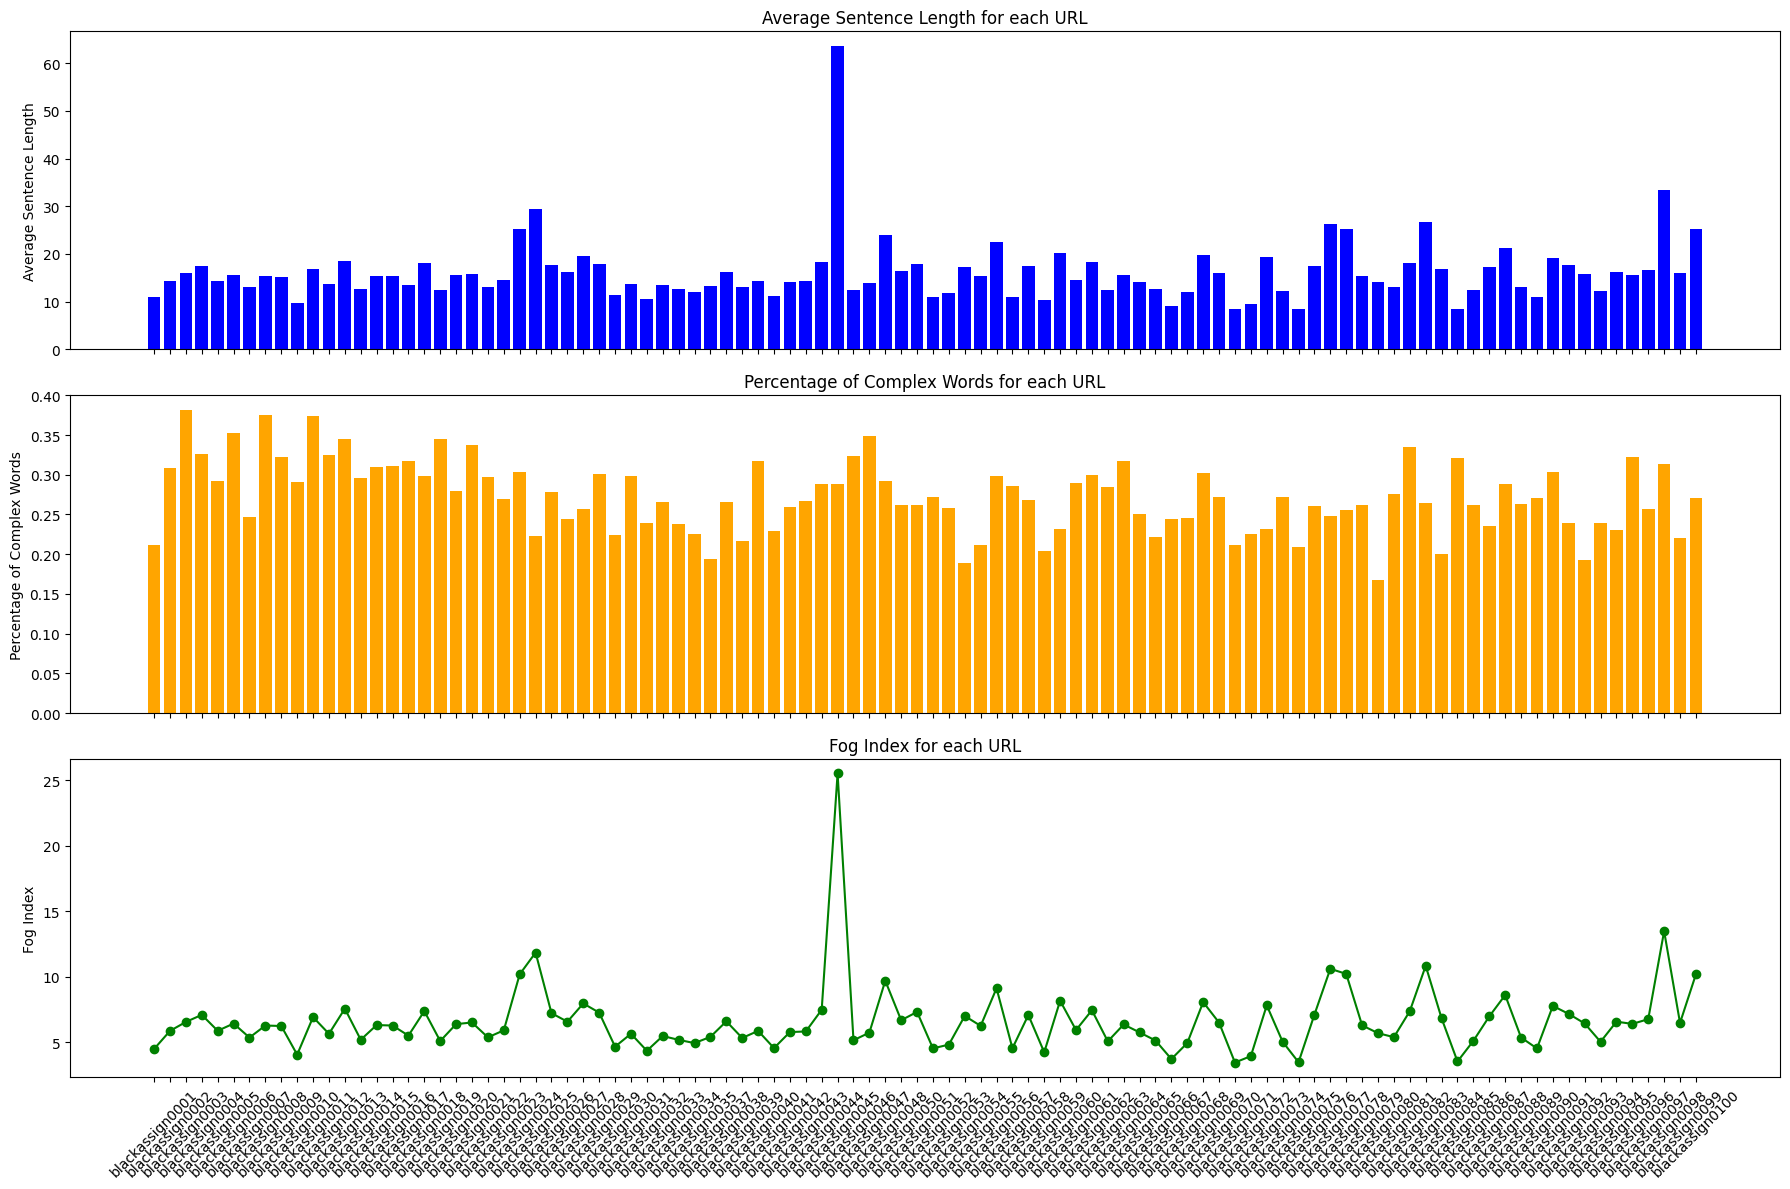

In [ ]:
# Path to the directory containing the readability analysis files
readability_directory = '/content/Analysis of readability'

# Initialize lists to store URL IDs, average sentence lengths, percentage of complex words, and Fog indices
url_ids = []
avg_sentence_lengths = []
percentage_complex_words = []
fog_indices = []

# Iterate over each file in the directory
for filename in os.listdir(readability_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(readability_directory, filename)
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # Find and extract the scores from the lines
            avg_sentence_length_line = [line for line in lines if line.startswith('Average Sentence Length:')][0]
            avg_sentence_length = float(avg_sentence_length_line.split(':')[1].strip())

            percentage_complex_words_line = [line for line in lines if line.startswith('Percentage of Complex Words:')][0]
            percentage_complex_word = float(percentage_complex_words_line.split(':')[1].strip())

            fog_index_line = [line for line in lines if line.startswith('Fog Index:')][0]
            fog_index = float(fog_index_line.split(':')[1].strip())

            url_ids.append(filename.split('_')[0])  # Extract URL ID from the file name
            avg_sentence_lengths.append(avg_sentence_length)
            percentage_complex_words.append(percentage_complex_word)
            fog_indices.append(fog_index)

# Sort the data by URL ID
data_sorted = sorted(zip(url_ids, avg_sentence_lengths, percentage_complex_words, fog_indices), key=lambda x: int(x[0].split('_')[0].replace('blackassign', '')))
url_ids_sorted, avg_sentence_lengths_sorted, percentage_complex_words_sorted, fog_indices_sorted = zip(*data_sorted)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(18, 12), sharex=True)

# Plot Average Sentence Lengths
axs[0].bar(url_ids_sorted, avg_sentence_lengths_sorted, color='blue')
axs[0].set_ylabel('Average Sentence Length')
axs[0].set_title('Average Sentence Length for each URL')

# Plot Percentage of Complex Words
axs[1].bar(url_ids_sorted, percentage_complex_words_sorted, color='orange')
axs[1].set_ylabel('Percentage of Complex Words')
axs[1].set_title('Percentage of Complex Words for each URL')

# Plot Fog Indices
axs[2].plot(url_ids_sorted, fog_indices_sorted, marker='o', color='green')
axs[2].set_ylabel('Fog Index')
axs[2].set_title('Fog Index for each URL')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Path to the directory containing the saved data
data_directory = '/content/Average Number of Words Per Sentence'

# Sort files based on URL ID
files = os.listdir(data_directory)
files.sort(key=lambda x: x.split('_')[0])

# Lists to store URL IDs and scores
url_ids = []
avg_words_per_sentence = []

# Read data from each file
for filename in files:
    file_path = os.path.join(data_directory, filename)
    with open(file_path, 'r') as file:
        lines = file.readlines()
        url_id = lines[0].split(': ')[1].strip()  # Extract URL ID
        avg_words = float(lines[1].split(': ')[1].strip())  # Extract average words per sentence
        url_ids.append(url_id)
        avg_words_per_sentence.append(avg_words)

# Plotting
plt.figure(figsize=(18, 6))
plt.bar(url_ids, avg_words_per_sentence, color='skyblue')
plt.xlabel('URL ID')
plt.ylabel('Average Number of Words Per Sentence')
plt.title('Average Number of Words Per Sentence for Each URL')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

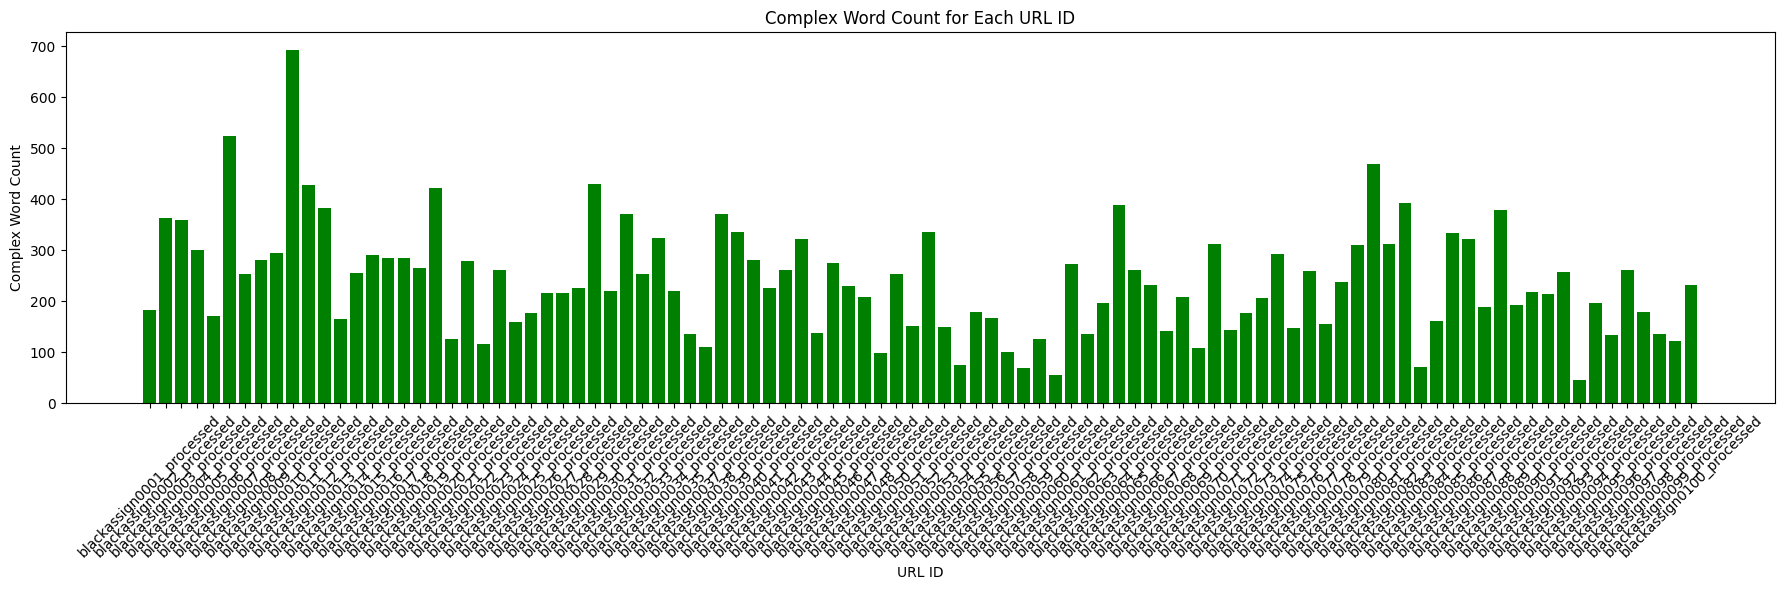

In [ ]:
# Path to the directory containing the data files
data_directory = '/content/complex word count'

# Sort files based on URL ID
files = os.listdir(data_directory)
files.sort(key=lambda x: int(x.split('_')[0].replace('blackassign0','')))

# Lists to store URL IDs and complex word counts
url_ids = []
complex_word_counts = []

# Read data from each file
for file_name in files:
    with open(os.path.join(data_directory, file_name), 'r') as file:
        lines = file.readlines()
        url_id = lines[0].split(': ')[1].strip()
        complex_word_count = int(lines[1].split(': ')[1].strip())
        url_ids.append(url_id)
        complex_word_counts.append(complex_word_count)

# Plot the data
plt.figure(figsize=(18, 6))
plt.bar(url_ids, complex_word_counts, color='green')
plt.xlabel('URL ID')
plt.ylabel('Complex Word Count')
plt.title('Complex Word Count for Each URL ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


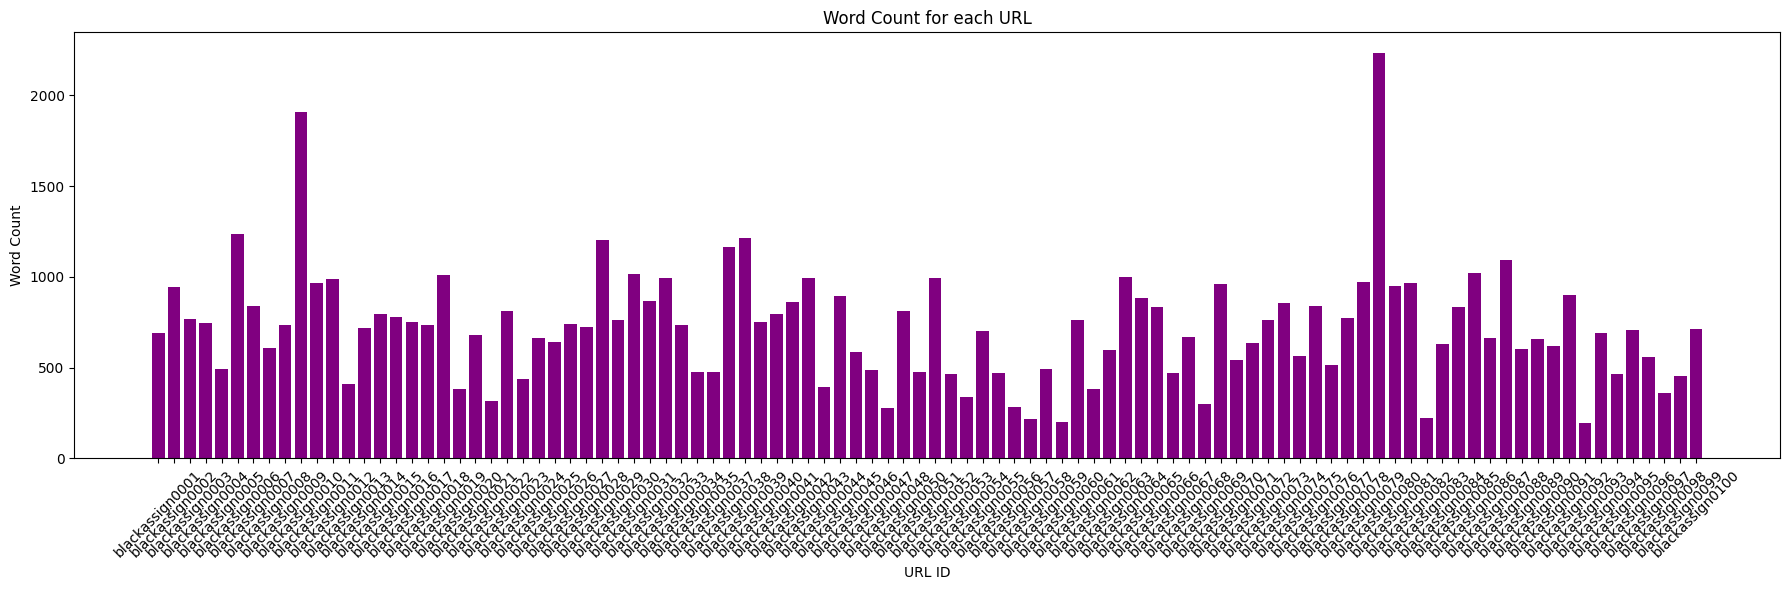

In [ ]:
# Path to the directory containing the Word Count files
word_count_directory = '/content/word counts'

# Initialize lists to store URL IDs and word counts
url_ids = []
word_counts = []

# Iterate over each file in the directory
for filename in os.listdir(word_count_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(word_count_directory, filename)
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # Find and extract the word count from the lines
            word_count_line = [line for line in lines if line.startswith('Word Count:')][0]
            word_count = int(word_count_line.split(':')[1].strip())

            url_ids.append(filename.split('_')[0])  # Extract URL ID from the file name
            word_counts.append(word_count)

# Sort the data by URL ID
data_sorted = sorted(zip(url_ids, word_counts), key=lambda x: int(x[0].split('_')[0].replace('blackassign', '')))
url_ids_sorted, word_counts_sorted = zip(*data_sorted)

# Plotting
plt.figure(figsize=(18, 6))
plt.bar(url_ids_sorted, word_counts_sorted, color='purple')
plt.xlabel('URL ID')
plt.ylabel('Word Count')
plt.title('Word Count for each URL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


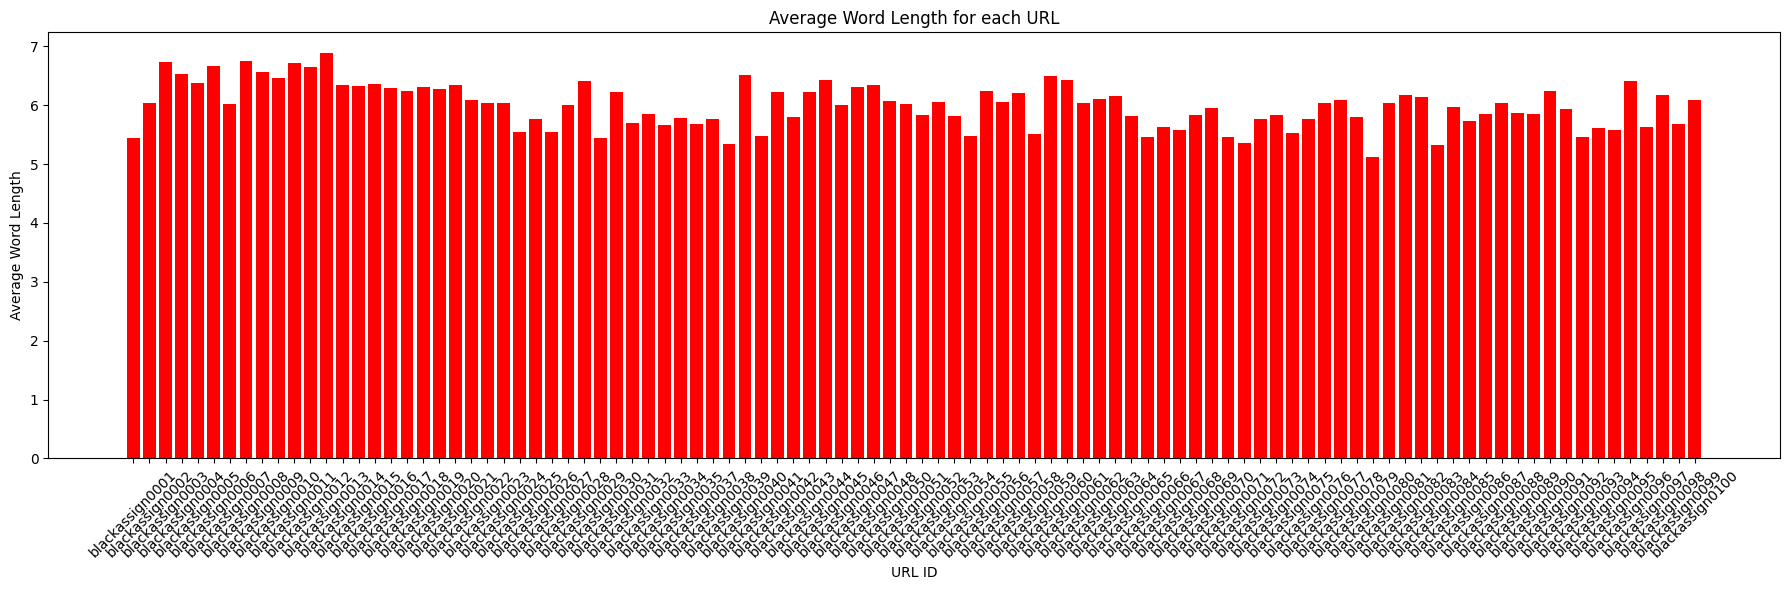

In [ ]:
# Path to the directory containing the Average Word Length files
average_word_length_directory = '/content/average word length'

# Initialize lists to store URL IDs and Average Word Lengths
url_ids = []
average_word_lengths = []

# Iterate over each file in the directory
for filename in os.listdir(average_word_length_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(average_word_length_directory, filename)
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # Find and extract the Average Word Length from the lines
            average_word_length_line = [line for line in lines if line.startswith('Average Word Length:')][0]
            average_word_length = float(average_word_length_line.split(':')[1].strip())
            url_ids.append(filename.split('_')[0])  # Extract URL ID from the file name
            average_word_lengths.append(average_word_length)

# Sort the data by URL ID
data_sorted = sorted(zip(url_ids, average_word_lengths), key=lambda x: int(x[0].split('_')[0].replace('blackassign', '')))
url_ids_sorted, average_word_lengths_sorted = zip(*data_sorted)

# Plotting
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
plt.bar(range(len(url_ids_sorted)), average_word_lengths_sorted, color='red')
plt.xlabel('URL ID')
plt.ylabel('Average Word Length')
plt.title('Average Word Length for each URL')
plt.xticks(range(len(url_ids_sorted)), url_ids_sorted, rotation=45)  # Set the x-axis labels to the URL IDs
plt.tight_layout()
plt.show()

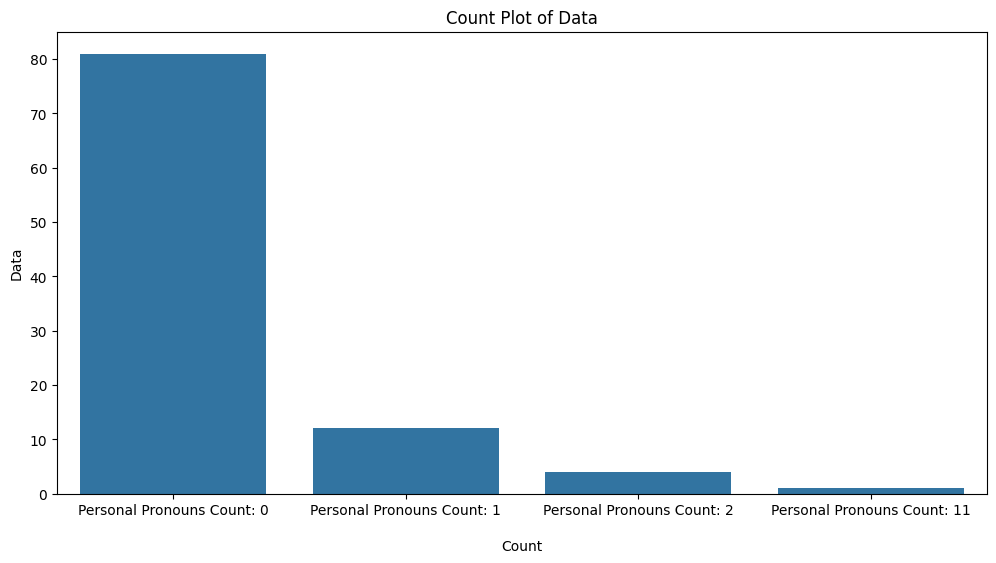

In [ ]:
# Path to the directory containing your data files
data_directory = '/content/Personal Pronoun'

# Initialize an empty list to store the data
data = []

# Iterate over each file in the directory
for filename in os.listdir(data_directory):
    if filename.endswith('.txt'):  # Assuming your data files are text files
        file_path = os.path.join(data_directory, filename)
        with open(file_path, 'r') as file:
            # Read the data from the file (modify this based on your data format)
            file_data = file.read()
            # Append the data to the list
            data.append(file_data)

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['Data'])

# Plotting
plt.figure(figsize=(12,6))
sns.countplot(x='Data', data=df, order=df['Data'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Data')
plt.title('Count Plot of Data')
plt.show()

In [ ]:
# Path to the directory containing the files
directory_path = "/content/Sentimental Analysis"

# Initialize lists to store URL IDs and scores
url_ids = []
positive_scores = []
negative_scores = []
polarity_scores = []
subjectivity_scores = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, "r") as file:
        # Read the URL ID (assuming it's the first line of the file)
        url_id = file.readline().strip()
        # Read the positive score
        positive_score_line = file.readline().strip()
        positive_score_str = positive_score_line.split(":")[1].strip()
        positive_score = float(positive_score_str)
        # Read the negative score
        negative_score_line = file.readline().strip()
        negative_score_str = negative_score_line.split(":")[1].strip()
        negative_score = float(negative_score_str)
        # Read the polarity score
        polarity_score_line = file.readline().strip()
        polarity_score_str = polarity_score_line.split(":")[1].strip()
        polarity_score = float(polarity_score_str)
        # Read the subjectivity score
        subjectivity_score_line = file.readline().strip()
        subjectivity_score_str = subjectivity_score_line.split(":")[1].strip()
        subjectivity_score = float(subjectivity_score_str)
        # Append the URL ID and scores to the lists
        url_ids.append(url_id)
        positive_scores.append(positive_score)
        negative_scores.append(negative_score)
        polarity_scores.append(polarity_score)
        subjectivity_scores.append(subjectivity_score)

# Create a dictionary with the data
data = {
    "URL ID": url_ids,
    "POSITIVE SCORE": positive_scores,
    "NEGATIVE SCORE": negative_scores,
    "POLARITY SCORE": polarity_scores,
    "SUBJECTIVITY SCORE": subjectivity_scores
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by "URL ID"
df.sort_values(by="URL ID", inplace=True)

# Specify the output Excel file path
output_excel_path = "/content/Sentimental Analysis Output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Excel file saved to {output_excel_path}")

Excel file saved to /content/Sentimental Analysis Output.xlsx


In [ ]:
# Path to the directory containing the files
directory_path = "/content/Analysis of readability"

# Initialize lists to store URL IDs and readability metrics
avg_sentence_lengths = []
percentage_complex_words = []
fog_indices = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, "r") as file:
        # Read the URL ID (assuming it's the first line of the file)
        url_id = file.readline().strip()
        # Read the Average Sentence Length
        avg_sentence_length = float(file.readline().strip().split(":")[1])
        # Read the Percentage of Complex Words
        percentage_complex_word = float(file.readline().strip().split(":")[1])
        # Read the Fog Index
        fog_index = float(file.readline().strip().split(":")[1])
        # Append the data to the lists
        avg_sentence_lengths.append(avg_sentence_length)
        percentage_complex_words.append(percentage_complex_word)
        fog_indices.append(fog_index)

# Create a dictionary with the data
data = {
    "AVERAGE SENTENCE LENGTH": avg_sentence_lengths,
    "PERCENTAGE OF COMPLEX WORDS": percentage_complex_words,
    "FOG INDEX": fog_indices
}

# Create a DataFrame
df = pd.DataFrame(data)

# Specify the output Excel file path
output_excel_path = "/content/Analysis of readability output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Excel file saved to {output_excel_path}")

Excel file saved to /content/Analysis of readability output.xlsx


In [ ]:
# Path to the directory containing the files
directory_path = "/content/Average Number of Words Per Sentence"

# Initialize lists to store URL IDs and the average number of words per sentence
avg_words_per_sentence = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, "r") as file:
        # Read the URL ID (assuming it's the first line of the file)
        url_id = file.readline().strip()
        # Read the pre-calculated average number of words per sentence (assuming it's the second line of the file)
        avg_words = float(file.readline().strip().split(":")[1])
        # Append the average number of words per sentence to the list
        avg_words_per_sentence.append(avg_words)

# Create a dictionary with the data
data = {
    "AVERAGE NUMBER OF WORDS PER SENTENCE": avg_words_per_sentence
}

# Create a DataFrame
df = pd.DataFrame(data)

# Specify the output Excel file path
output_excel_path = "/content/Average number of words per sentence output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Excel file saved to {output_excel_path}")


Excel file saved to /content/Average number of words per sentence output.xlsx


In [ ]:
# Path to the directory containing the files
directory_path = "/content/complex word count"

# Initialize lists to store URL IDs and the count of complex words
complex_word_counts = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, "r") as file:
        # Read the URL ID (assuming it's the first line of the file)
        url_id = file.readline().strip()
        # Read the pre-calculated count of complex words (assuming it's the third line of the file)
        complex_word_count = int(file.readline().strip().split(":")[1])
        # Append the count of complex words to the lists
        complex_word_counts.append(complex_word_count)

# Create a dictionary with the data
data = {
    "COMPLEX WORD COUNT": complex_word_counts
}

# Create a DataFrame
df = pd.DataFrame(data)

# Specify the output Excel file path
output_excel_path = "/content/complex word count output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Excel file saved to {output_excel_path}")

Excel file saved to /content/complex word count output.xlsx


In [ ]:
# Path to the directory containing the files
directory_path = "/content/word counts"

# Initialize lists to store URL IDs and the word count
word_counts = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, "r") as file:
        # Read the URL ID (assuming it's the first line of the file)
        url_id = file.readline().strip()
        # Read the pre-calculated word count (assuming it's the fourth line of the file)
        word_count = int(file.readline().strip().split(":")[1])
        # Append the word count to the lists

        word_counts.append(word_count)

# Create a dictionary with the data
data = {
    "WORD COUNT": word_counts
}

# Create a DataFrame
df = pd.DataFrame(data)

# Specify the output Excel file path
output_excel_path = "/content/word count output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Excel file saved to {output_excel_path}")

Excel file saved to /content/word count output.xlsx


In [ ]:
# Path to the directory containing the files
directory_path = "/content/Syllable Count Per Word"

# Initialize lists to store URL IDs and the syllable count per word
syllable_counts_per_word = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, "r") as file:
        # Read the URL ID (assuming it's the first line of the file)
        url_id = file.readline().strip()
        # Read the pre-calculated syllable count per word (assuming it's the fifth line of the file)
        syllable_count_per_word = float(file.readline().strip().split(":")[1])
        # Append the syllable count per word to the lists
        syllable_counts_per_word.append(syllable_count_per_word)

# Create a dictionary with the data
data = {
    "SYLLABLE COUNT PER WORD": syllable_counts_per_word
}

# Create a DataFrame
df = pd.DataFrame(data)

# Specify the output Excel file path
output_excel_path = "/content/syllable count per word output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Excel file saved to {output_excel_path}")

Excel file saved to /content/syllable count per word output.xlsx


In [ ]:
# Path to the directory containing the files
directory_path = "/content/Syllable Count Per Word"

# Initialize lists to store URL IDs and the count of personal pronouns
personal_pronoun_counts = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, "r") as file:
        # Read the URL ID (assuming it's the first line of the file)
        url_id = file.readline().strip()
        # Read the pre-calculated count of personal pronouns (assuming it's the sixth line of the file)
        line = file.readline().strip()
        personal_pronoun_count = 0  # Default value if not found
        if ":" in line:
            parts = line.split(":")
            if len(parts) >= 2:
                try:
                    personal_pronoun_count = int(parts[1])
                except ValueError:
                    pass  # Handle the case where the count is not an integer
        # Append the count of personal pronouns to the lists

        personal_pronoun_counts.append(personal_pronoun_count)

# Create a dictionary with the data
datas = {
    "PERSONAL PRONOUNS": personal_pronoun_counts
}

# Create a DataFrame
df = pd.DataFrame(datas)

# Specify the output Excel file path
output_excel_path = "/content/personal pronouns output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Excel file saved to {output_excel_path}")

Excel file saved to /content/personal pronouns output.xlsx


In [ ]:
# Path to the directory containing the files
directory_path = "/content/average word length"

# Initialize a list to store the data
data = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    with open(file_path, "r") as file:
        lines = file.readlines()
        if len(lines) >= 2:
            url_id = lines[0].strip()
            try:
                average_word_count = float(lines[1].strip().split(":")[1])
                data.append({"AVERAGE WORD LENGTH": average_word_count})
            except (ValueError, IndexError) as e:
                print(f"Error processing file {file_path}: {e}")
        else:
            print(f"Invalid format in file {file_path}")

# Create a DataFrame from the list
df = pd.DataFrame(data)

# Specify the output Excel file path
output_excel_path = "/content/Average word length output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(output_excel_path, index=False)

print(f"Excel file saved to {output_excel_path}")


Excel file saved to /content/Average word length output.xlsx


In [ ]:
# Read the Excel dataset into a DataFrame
df = pd.read_excel("/content/drive/MyDrive/text analysis data files/Input.xlsx")

# Initialize a list to store valid URLs
valid_URLs = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    url = row['URL']
    try:
        # Attempt to make a request to the URL
        response = requests.get(url)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Add the URL to the list of valid URLs
            valid_URLs.append(url)
    except requests.exceptions.RequestException as e:
        # If an exception occurs, print the error message and skip this URL
        print(f"Error processing URL {url}: {e}")

# Create a new DataFrame with only the valid URLs
df_valid = df[df['URL'].isin(valid_URLs)]

# Specify the output Excel file path
output_excel_path = "updated_dataset.xlsx"

# Save the updated DataFrame to an Excel file
df_valid.to_excel(output_excel_path, index=False)

print(f"Updated dataset saved to {output_excel_path}")


Updated dataset saved to updated_dataset.xlsx


In [ ]:
# List of file paths to the Excel files
file_paths = [
    "/content/updated_dataset.xlsx",
    "/content/Sentimental Analysis Output.xlsx",
    "/content/Analysis of readability output.xlsx",
    "/content/Average number of words per sentence output.xlsx",
    "/content/complex word count output.xlsx",
    "/content/word count output.xlsx",
    "/content/syllable count per word output.xlsx",
    "/content/personal pronouns output.xlsx",
    "/content/Average word length output.xlsx"
]
# Specify the order in which you want to concatenate the files
order = [1, 2, 3, 4, 5, 6, 7, 8,9]  # Adjust the order as needed, ensuring it matches the number of file paths
  # Change the order as needed

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Read each Excel file into a DataFrame and concatenate them
for file_index in order:
    file_path = file_paths[file_index - 1]
    try:
        df = pd.read_excel(file_path)
        concatenated_df = pd.concat([concatenated_df, df], axis=1)  # Concatenate along columns
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# Specify the output Excel file path
output_excel_path = "/content/Output data structures.xlsx"

# Save the concatenated DataFrame to an Excel file
try:
    concatenated_df.to_excel(output_excel_path, index=False)
    print(f"Excel files concatenated and saved to {output_excel_path}")
except Exception as e:
    print(f"Error saving concatenated data to {output_excel_path}: {e}")


In [ ]:
# Load the Excel file
file_path = "/content/Output data structures.xlsx"
df = pd.read_excel(file_path)

# Check if the DataFrame has at least 3 columns before dropping the third column
if len(df.columns) >= 3:
    # Drop the third column
    df.drop(columns=[df.columns[2]], inplace=True)

    # Save the modified DataFrame back to the Excel file
    df.to_excel(file_path, index=False)
    print("Third column removed and file saved successfully.")
else:
    print("The DataFrame does not have at least 3 columns.")


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to save the file in your Google Drive
output_drive_path = '/content/drive/My Drive/Output data structures.xlsx'

# Save the modified DataFrame back to the Excel file in your Google Drive
df.to_excel(output_drive_path, index=False)